In [2]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable, grad
import model_gp as model
from tqdm import tqdm
import torchvision
import matplotlib.pyplot as plt

5
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([3, 64, 64])
torch.Size([5, 3, 64, 64])


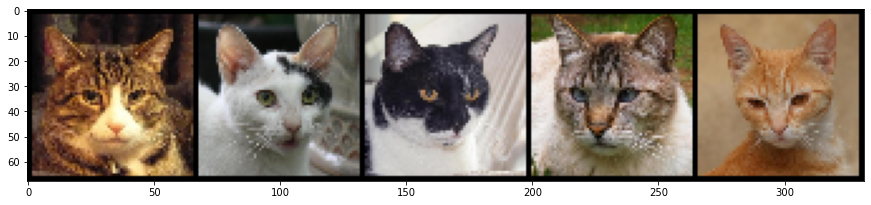

In [22]:
#print pictures from datasets
from crypko_data import crypkoFace as cy
from bedroom_data import bedroom as bd
from human_face_data import humanFace as hf
from cat_data import catFace as cat

ds1=cy()
ds2=bd()
ds3=hf()
ds4=cat()

#noise=Variable(torch.randn(1, 200)).cuda()
print(len(ds1))
samples=[]

#plt.imshow(ds1[2].numpy().transpose(1,2,0))

for i in range(5):
    print(ds3[i].shape)
    fake_sample = (ds4[i].data+ 1) / 2.0    #normalization
    fake_sample = fake_sample.view(1,3,64,64)
    samples.append(fake_sample)
samples = torch.vstack(samples)
print(samples.shape)
plt.figure(figsize=(15,15))

grid_img = torchvision.utils.make_grid(samples.cpu(), nrow=5)
plt.imshow(grid_img.permute(1, 2, 0))


In [3]:
#model initialization
G=model.generator(200).cuda()
#load savepoint
G.load_state_dict(torch.load('savepoint\iters_13999_G.pth'))

<All keys matched successfully>

In [4]:
G.eval()

generator(
  (l1): Sequential(
    (0): ConvTranspose2d(200, 1024, kernel_size=(4, 4), stride=(1, 1))
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l2): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l3): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (l4): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (fin): Sequential(
    (0): ConvTranspose2d(128, 3, kernel_size=(4, 4), stride=(2, 2), p

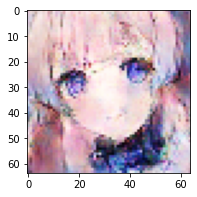

In [172]:
#noise=Variable(torch.randn(1, 200)).cuda()
fake_sample = (G(save5).data + 1) / 2.0     #normalization
grid_img = torchvision.utils.make_grid(fake_sample.cpu(), nrow=1)
plt.figure(figsize=(3,3))
plt.imshow(grid_img.permute(1, 2, 0))
plt.show()

In [170]:
torchvision.utils.save_image(fake_sample, f'progress_check\pics\{n}.jpg', nrow=10)
n+=1

In [8]:
save1=noise

In [94]:
save2=noise

In [102]:
save3=noise

In [154]:
save4=noise

In [171]:
save5=noise

In [422]:
save1
save2
save3
save4
save5

tensor([[-0.4284, -0.4448, -0.2854,  0.6612, -0.0662, -1.7624, -0.9025, -0.9113,
         -1.0700, -2.0707,  1.2300,  0.5702,  0.8773, -0.8809,  0.8268,  1.2340,
          2.2643,  0.1844, -0.3901,  1.6779,  1.5108,  1.3275,  0.6243, -0.1041,
         -0.4378, -2.1634,  0.8142, -0.8247, -0.9995,  3.1553, -0.3101, -0.1382,
          0.0303,  1.4535,  1.4268,  0.3417,  0.6944,  0.0066,  1.9239,  0.6270,
          1.4750,  0.1130,  0.1369, -1.8770,  0.7276,  0.3527,  0.1407, -0.4719,
         -0.8325, -0.1394, -0.5536, -1.9535, -0.9508,  1.5965,  0.2214,  1.0866,
         -1.2031, -0.3371, -0.5675,  0.4628,  0.7541,  0.2408, -1.2465, -0.1177,
          0.0490, -0.5660, -0.3671, -1.3236, -1.0350,  0.4152, -0.7723,  1.6072,
         -0.3306,  1.3660,  1.5218,  1.1385,  0.7107, -1.0767, -0.9175, -1.0670,
         -0.4849, -1.1672,  0.0140, -1.6971, -0.0334,  0.7017,  1.0001, -1.9929,
          0.1351, -1.2996,  1.6545,  0.2389, -0.5712, -0.1158, -1.9444, -0.0546,
          1.7353, -0.1475, -

torch.Size([10, 3, 64, 64])


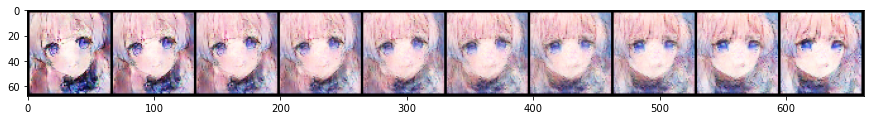

In [173]:
scalar=Variable(torch.linspace(0, 1, 10)).cuda()
interpolation=[save1*i+save5*(1-i) for i in scalar]
inter=[]
for i in interpolation:
    fake_sample = (G(i).data + 1) / 2.0     #normalization
    inter.append(fake_sample)
inter = torch.vstack(inter)
print(inter.shape)
plt.figure(figsize=(15,15))

grid_img = torchvision.utils.make_grid(inter.cpu(), nrow=10)
plt.imshow(grid_img.permute(1, 2, 0))